In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from env import Percent
from env import gdb

# Exercises
Do your work for this exercise in either a python script named `probability_distributions.py` or a jupyter notebook named `probability_distributions.ipynb`.

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [2]:
λ = 2
noon_cars = stats.poisson(λ)

- What is the probability that no cars drive up in the noon hour?

In [3]:
Percent(noon_cars.pmf(0))

13.53%

- What is the probability that 3 or more cars come through the drive through?

In [4]:
Percent(noon_cars.sf(2))

32.33%

- How likely is it that the drive through gets at least 1 car?

In [6]:
Percent(noon_cars.sf(0))

86.47%

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [7]:
μ = 3
σ = .3
grades = stats.norm(μ, σ)

- What grade point average is required to be in the top 5% of the graduating class?

In [8]:
grades.isf(.05)

3.4934560880854417

- What GPA constitutes the bottom 15% of the class?

In [9]:
grades.isf(.85)

2.689069983151863

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [14]:
grades.ppf([.3,.4])

array([2.84267985, 2.92399587])

- If I have a GPA of 3.5, what percentile am I in?

In [21]:
Percent(grades.sf(3.5))

4.78%

3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [22]:
t = 4326
p = .02
clicks = stats.binom(t,p)

In [24]:
Percent(clicks.sf(97))

11.78%

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [28]:
t = 100
p = 1/100
homework = stats.binom(t,p)
Percent(homework.sf(1))
# chance of getting one right

26.42%

- What is the probability that at least one of your first 60 answers is correct?

In [29]:
t = 60
homework = stats.binom(t,p)
Percent(homework.sf(1))

12.12%

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [31]:
p = .03
t = .9 * 3 * 22
d = 1
cleaned = stats.binom(t*d,p)
Percent(cleaned.sf(1))

53.54%

In [35]:
d = 2
cleaner = stats.binom(t*d,p)
Percent(1-cleaner.sf(1))

12.54%

In [42]:
d = 7
cleanest = stats.binom(t*d,p)
Percent(1-cleanest.sf(1))

0.00%

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [45]:
μ = 15
σ = 3

line_length = stats.norm(μ, σ)

line_length.cdf(15)

0.5

In [46]:
#  at least 15 minutes to eat means that we have 
# 45 minutes to wait through the line order our food and get the food
60 - 15

45

In [48]:
# it takes 2 minute to order our food, and 10 minutes to get it
# this leaves us 33 minutes to wait in line
45 - 12

33

In [50]:
# each person takes 2 minutes to order meaning that 16.5 people can order in 33 minutes
33 / 2

16.5

In [51]:
# if we want at least 15 minutes to eat, there can't be more than 16 people in line
Percent(line_length.cdf(16))

63.06%

7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [55]:
# gdb('employees', 'SELECT s.salary FROM salaries s')

NameError: name 'employees' is not defined

In [54]:
from env import get_db_url

In [57]:
url = get_db_url('employees')
query = 'SELECT s.salary FROM salaries s'

salaries = pd.read_sql(query, url)

In [63]:
μ = salaries.mean()[0]
σ = salaries.std()[0]

sal_dist = stats.norm(μ, σ)

- What percent of employees earn less than 60,000?

In [65]:
Percent(sal_dist.cdf(60_000))

41.08%

In [75]:
Percent((salaries['salary'] <= 60_000).mean())

47.40%

- What percent of employees earn more than 95,000?

In [77]:
Percent(sal_dist.sf(95_000))

3.25%

In [79]:
Percent((salaries['salary'] > 95_000).mean())

5.36%

#### scipy distribution object: What can we calculate from distribution?


- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable     
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point   
   -- isf: greater than a point  
- rvs for random values 

**Hint:** You can feed more than one value into
- cdf
- ppf
- ex: some_distribution.cdf([4,7])

- What percent of employees earn between 65,000 and 80,000?

In [82]:
a = 65_000
b = 90_000
slice_sal = sal_dist.cdf([a,b])
Percent(slice_sal[1] - slice_sal[0])

41.13%

In [85]:
Percent(((salaries['salary'] > 65_000) & (salaries['salary'] < 80_000)).mean())

24.33%

- What do the top 5% of employees make?

In [89]:
round(sal_dist.isf(.05),2)

91616.72

In [95]:
salaries['sal_with_20_quantile'] = pd.qcut(salaries['salary'],20, labels=['bottom 5%',
                                       '5% - 10%',
                                       '10% - 15%',
                                       '15% - 20%',
                                       '20% - 25%',
                                       '25% - 30%',
                                       '30% - 35%',
                                       '35% - 40%',
                                       '40% - 45%',
                                       '45% - 50%',
                                       '50% - 55%',
                                       '55% - 60%',
                                       '60% - 65%',
                                       '65% - 70%',
                                       '70% - 75%',
                                       '75% - 80%',
                                       '80% - 85%',
                                       '85% - 90%',
                                       '90% - 95%',
                                       '95% - 100%'
                                      ])

In [99]:
salaries

,salary,sal_with_20_quantile
0,60117,45% - 50%
1,62102,50% - 55%
2,66074,60% - 65%
3,66596,60% - 65%
4,66961,60% - 65%
...,...,...
2844042,63707,55% - 60%
2844043,67043,60% - 65%
2844044,70745,65% - 70%
2844045,74327,75% - 80%


In [100]:
salaries[salaries['sal_with_20_quantile'] == '95% - 100%']

,salary,sal_with_20_quantile
168,96122,95% - 100%
169,98522,95% - 100%
170,99651,95% - 100%
221,96646,95% - 100%
482,97571,95% - 100%
...,...,...
2843949,120013,95% - 100%
2843950,119906,95% - 100%
2843965,96198,95% - 100%
2843966,98836,95% - 100%


In [102]:
(salaries['sal_with_20_quantile'] == '95% - 100%').mean()

0.04999882210104123

In [105]:
top_5 = salaries[salaries['sal_with_20_quantile'] == '95% - 100%']

In [107]:
top_5['salary'].min()

95762

In [108]:
top_5['salary'].max()

158220

In [110]:
sal_dist.sf(158_220)

1.1701836388176888e-08

array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

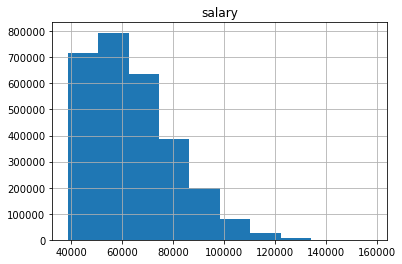

In [114]:
salaries[['salary']].hist()

**Hint:** If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your `.gitignore`, your `env.py`, and to use `pd.read_sql`. Copy over your `.gitignore` and `env.py` from your data science libraries exercises folder, and connect to the employees database like so:

In [ ]:
import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
pd.read_sql('SELECT * FROM departments', url)
While time is the most common interval used, the poisson distribution can also be used for intervals like distance, area, or volume. 